# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

------------------------------------

# Answers Below: 

1. The task is a regression problem using both numerical and categorical data
2. I expect to load in data, transform it using a combination of imputing and one-hot encoding, train a model, and generate predictions for SalePrice
3. I plan to measure the mean_squared_error (MSE) as well as the Root_mean_squared_erro (RMSE)
4. There are currently about 1500 rows of housing data for Ames, Iowa available for model training. We should collect as much as possible, it is always easier to choose what data not to use than it is to collect more on an Ad-hoc basis.
5. I intend to use a gradient descent learning algorithm with tuned hyperparameters using gridsearchcv
6. A reasonable amount, I am relatively new to this so an average RMSE in the low 5 figures would be ideal.
7. We are assuming this data to be accurate and predictive of the quality and prices of the houses listed.

## Notes:
- I am train_test_splitting the Files/train.csv dataset for a train and validation set and am keeping the test.csv as a permanent holdout until the model is fully trained and available.

------------------------------------

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignore DeprecationWarnings from XGBoost
warnings.filterwarnings("ignore", category=UserWarning) 


import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadTrainData():
  # The column names are adopted from the dataset page on Kaggle
  data = pd.read_csv('Files/train.csv')
  return data

def loadTestData():
    data = pd.read_csv('Files/test.csv')
    return data

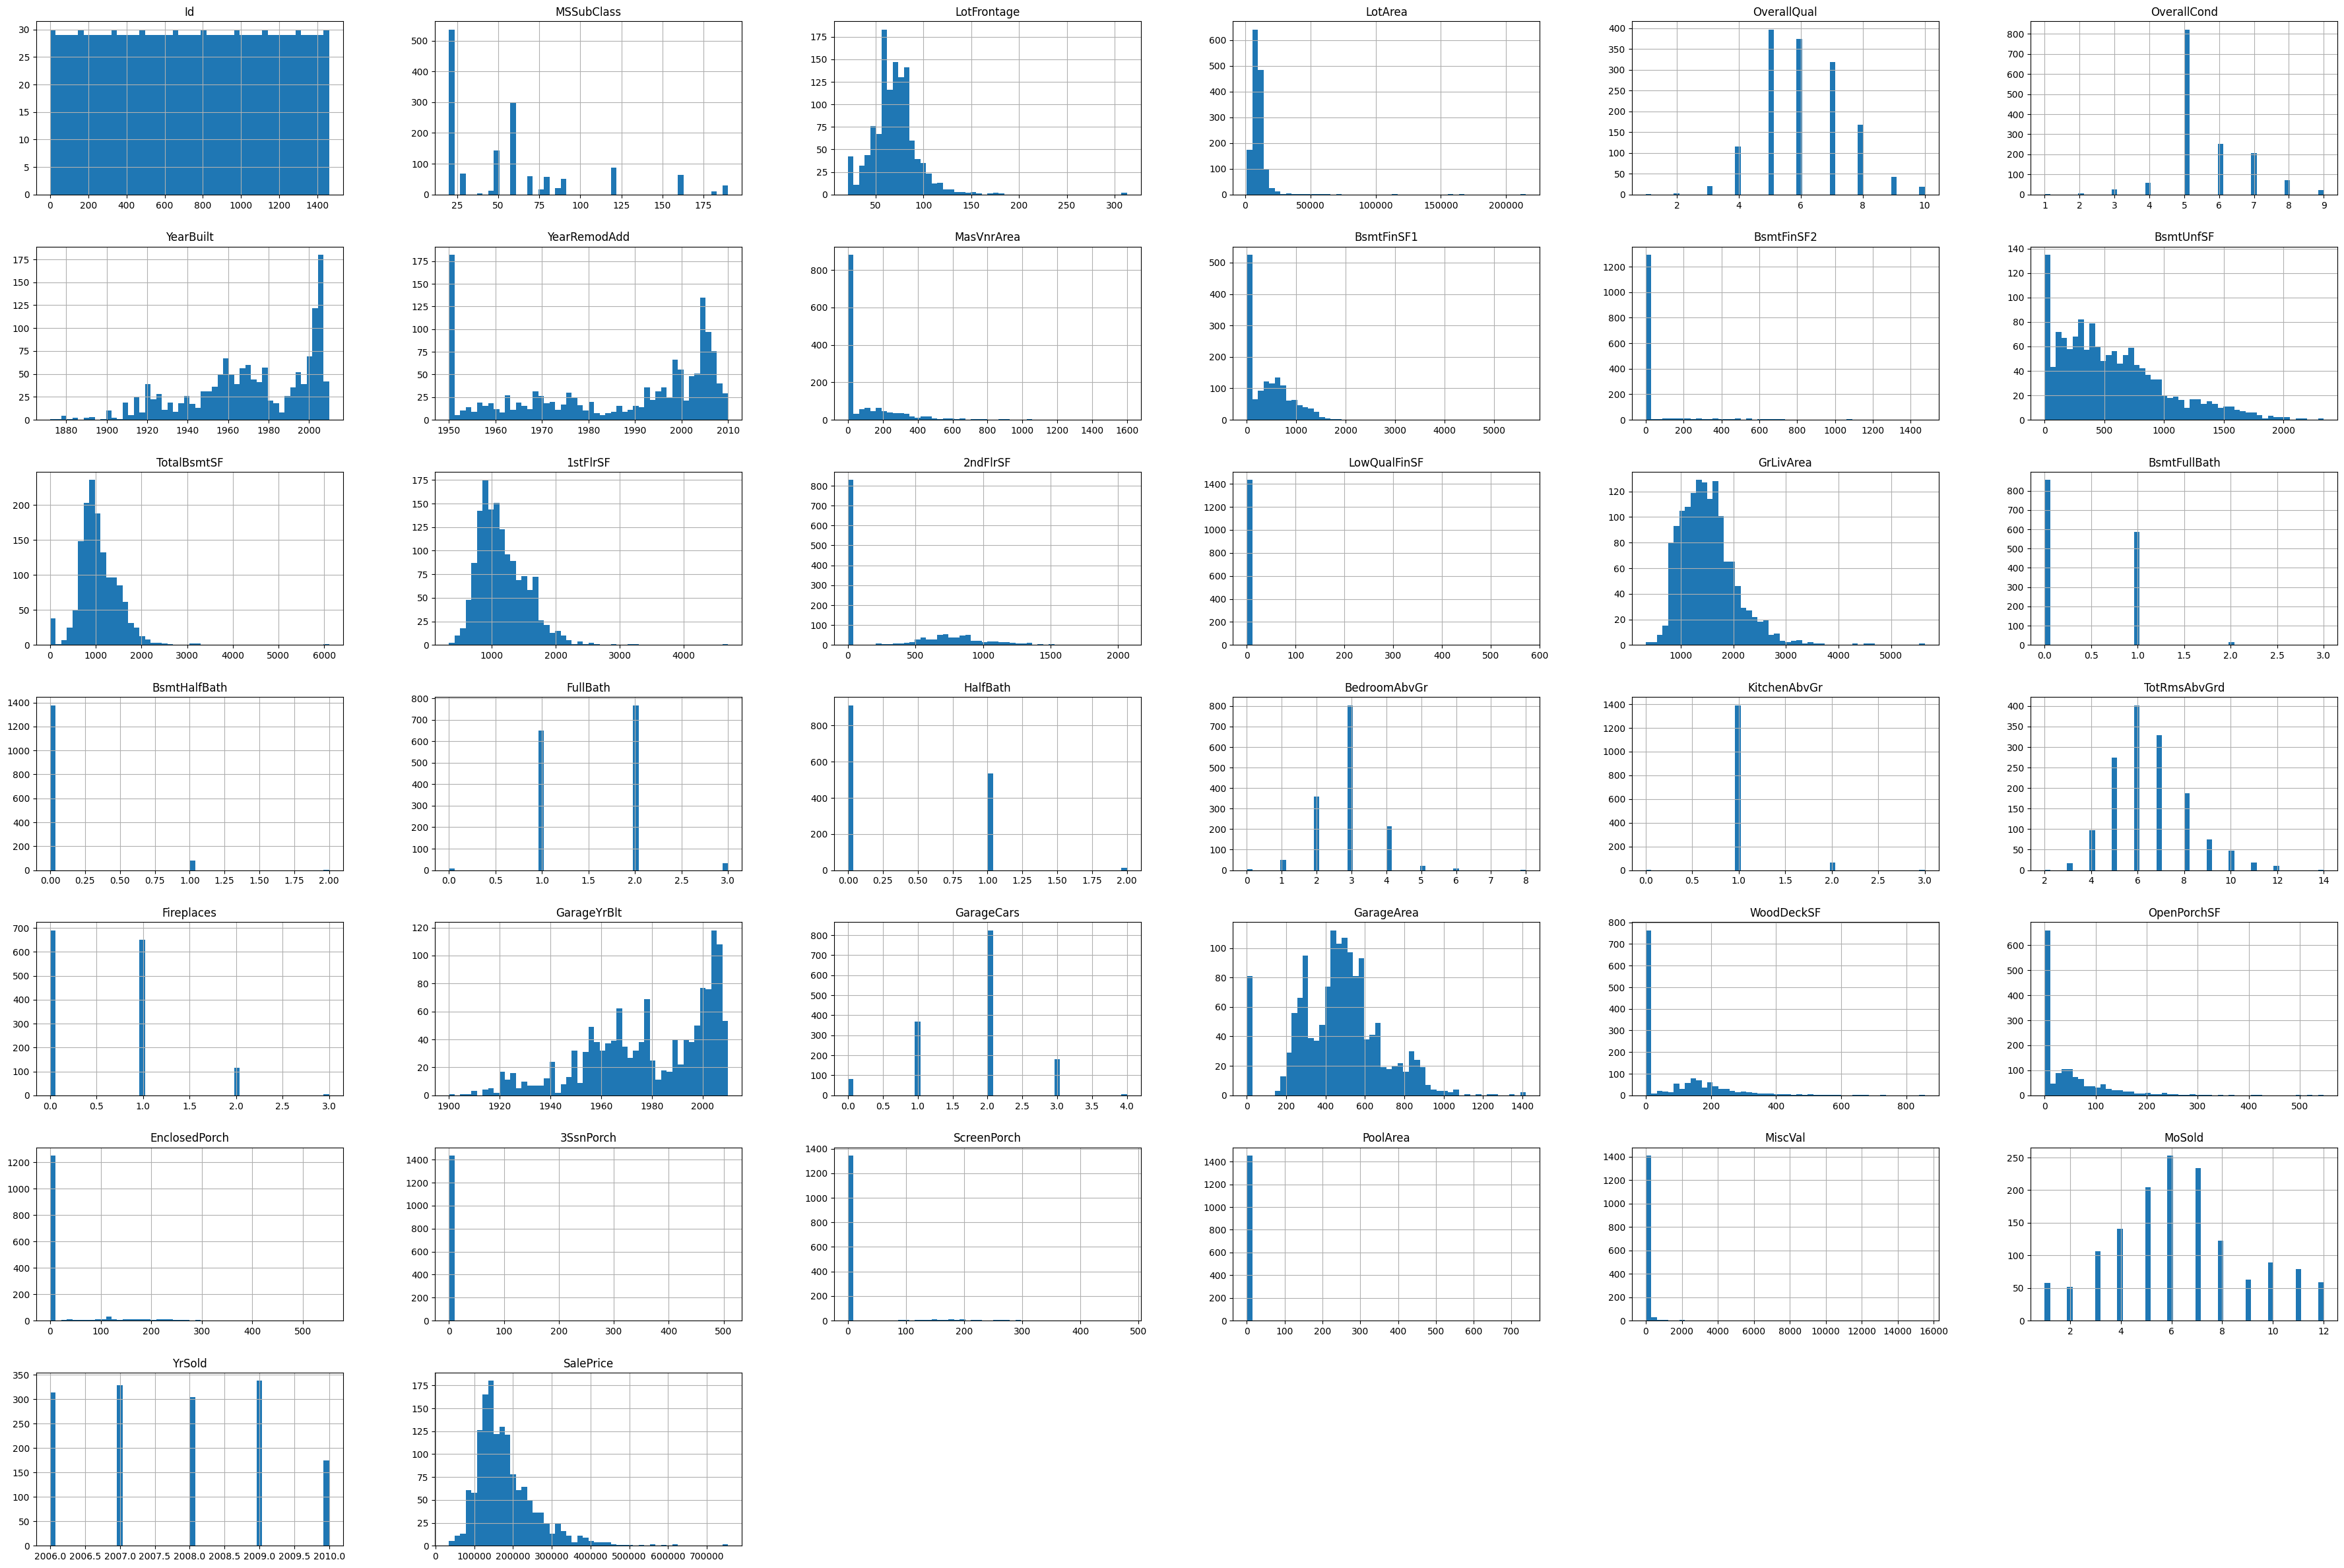

In [3]:
housing= loadTrainData()

housing.hist(bins=50, figsize=(45,30))
plt.show()

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

-------------------------------

In [4]:
from pandas.plotting import scatter_matrix

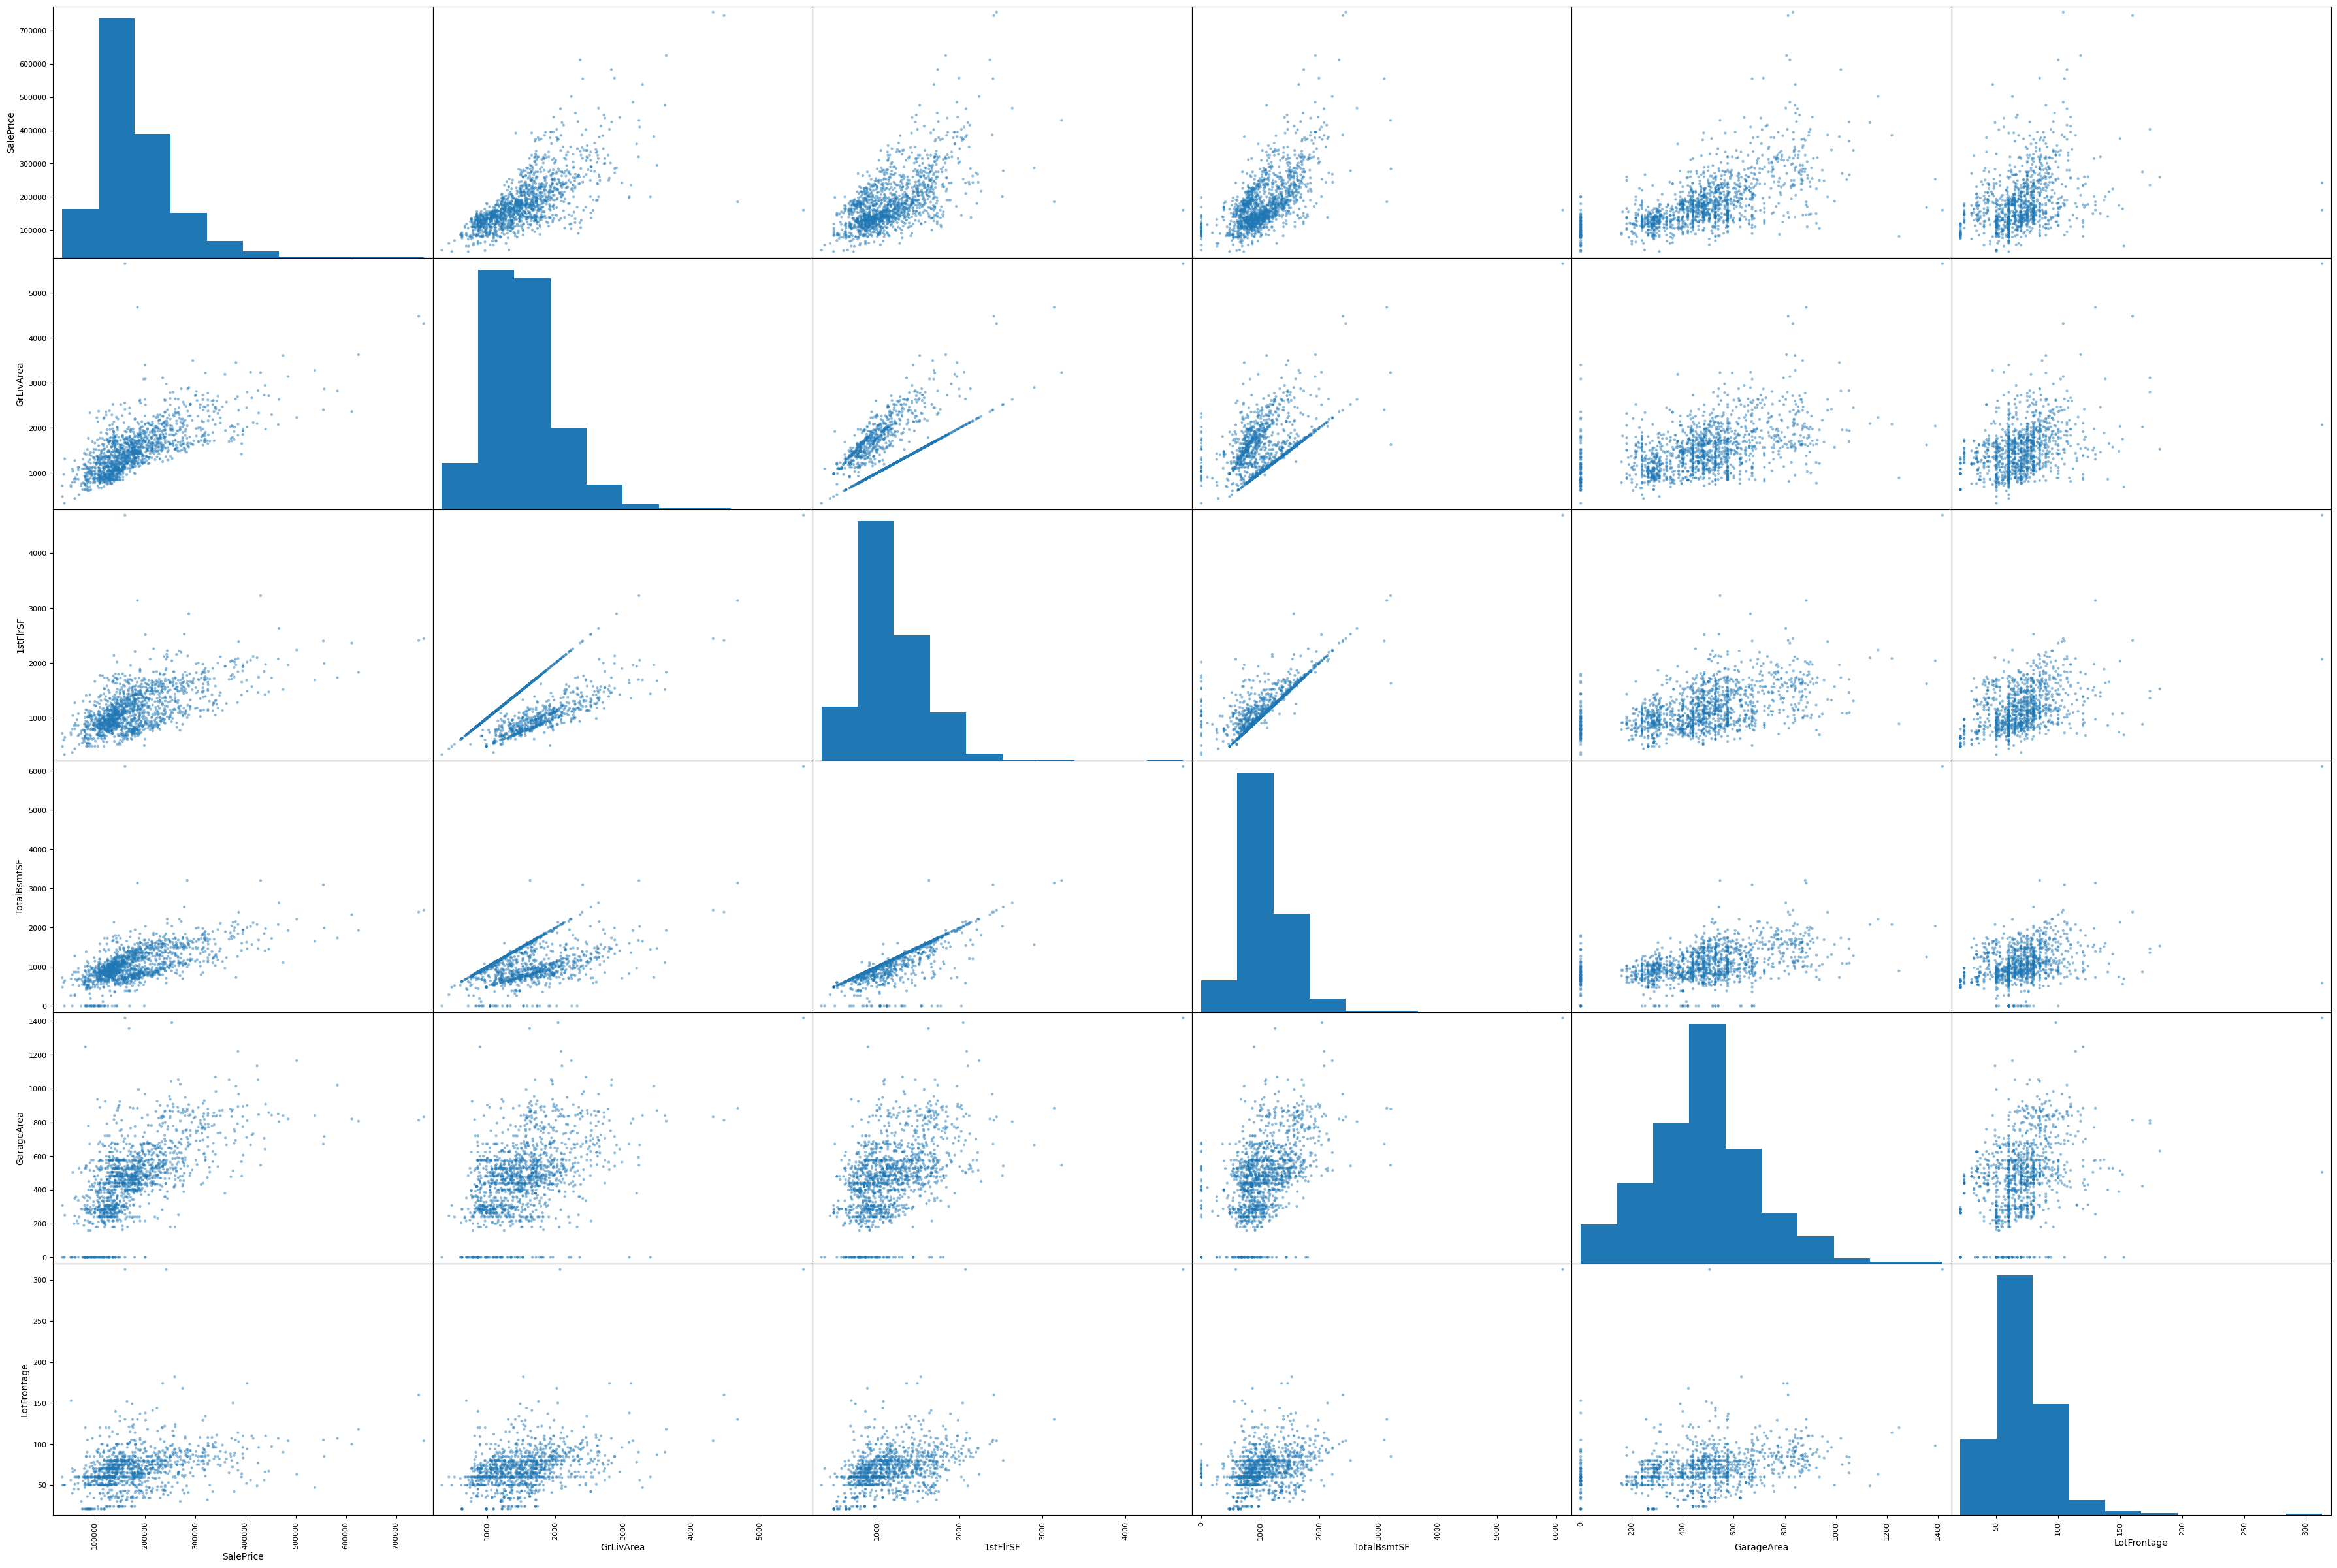

In [5]:
possible_correlators = ['SalePrice', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'LotFrontage']

scatter_matrix(housing[possible_correlators], figsize=(45,30))
plt.show()

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
housing.select_dtypes(include=['object']).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


-------------------------------

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

-----------------------------------------------------------------

In [9]:
housing.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
#These columns were filtered out based on having too few values are too many of one value, > 1200 of a single value out of ~1500 houses makes it more or less useless
cols_to_drop = ['Utilities', 'Alley', 'LandContour', 'LandSlope'
                , 'Condition2', 'RoofMatl', 'MasVnrType'
                , 'BsmtCond', 'BsmtFinType2', 'Heating'
                , 'CentralAir', 'Electrical', 'Functional'
                , 'GarageQual', 'GarageCond', 'PavedDrive'
                , 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'FireplaceQu']

In [11]:
housing_cut = housing.drop(columns=cols_to_drop)

## **Going to start by ordinal encoding the categorical columns then try One-Hot Encoding them**

In [12]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [13]:
#select exclusively non-numeric columns and ordinally encode them. 
columns_to_encode = housing_cut.select_dtypes(include=['object']).columns

housing_cut_ordinaled = ordinal_encoder.fit_transform(housing_cut[columns_to_encode])

In [14]:
#drop original columns, add the encoded ones with dynamic names
encoded_columns = [f"encoded_{col}" for col in columns_to_encode]
housing_tr = housing_cut.copy()
housing_tr[encoded_columns] = housing_cut_ordinaled
housing_tr.drop(columns=columns_to_encode, inplace=True)

## **For now, going to fill df NAN's with 0 because that makes most sense**

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'constant', fill_value=0)

In [16]:
housing_imputed = imputer.fit_transform(housing_tr)

In [17]:
housing_cut_ordinaled_imputed = pd.DataFrame(housing_imputed, columns=housing_cut.columns)

In [18]:
housing_cut_ordinaled_imputed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,3.0,1.0,3.0,4.0,5.0,2.0,0.0,5.0,1.0,12.0,13.0,2.0,4.0,2.0,2.0,3.0,2.0,0.0,2.0,1.0,1.0,8.0,4.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,3.0,1.0,3.0,2.0,24.0,1.0,0.0,2.0,1.0,8.0,8.0,3.0,4.0,1.0,2.0,1.0,0.0,0.0,3.0,1.0,1.0,8.0,4.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,3.0,1.0,0.0,4.0,5.0,2.0,0.0,5.0,1.0,12.0,13.0,2.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,8.0,4.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,3.0,1.0,0.0,0.0,6.0,2.0,0.0,5.0,1.0,13.0,15.0,3.0,4.0,0.0,3.0,3.0,0.0,2.0,2.0,5.0,2.0,8.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,3.0,1.0,0.0,2.0,15.0,2.0,0.0,5.0,1.0,12.0,13.0,2.0,4.0,2.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,8.0,4.0


## **All Data Numerical - No NaN's:**

In [19]:
housing_cut_ordinaled_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   float64
 6   LotShape       1460 non-null   float64
 7   LotConfig      1460 non-null   float64
 8   Neighborhood   1460 non-null   float64
 9   Condition1     1460 non-null   float64
 10  BldgType       1460 non-null   float64
 11  HouseStyle     1460 non-null   float64
 12  OverallQual    1460 non-null   float64
 13  OverallCond    1460 non-null   float64
 14  YearBuilt      1460 non-null   float64
 15  YearRemodAdd   1460 non-null   float64
 16  RoofStyle      1460 non-null   float64
 17  Exterior1st    1460 non-null   float64
 18  Exterior

---------------
# **Now to setup our pipeline to automate the above ^ :**

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

housing_data = loadTrainData()

#arrived at by checking # of NaN values + value_counts, will incorporate if model performance is lacking. 
cols_to_drop = ['Utilities', 'Alley', 'LandContour', 'LandSlope'
                , 'Condition2', 'RoofMatl', 'MasVnrType'
                , 'BsmtCond', 'BsmtFinType2', 'Heating'
                , 'CentralAir', 'Electrical', 'Functional'
                , 'GarageQual', 'GarageCond', 'PavedDrive'
                , 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType', 'FireplaceQu']

housing_data = housing_data.drop(columns=cols_to_drop)

housing_dropped = housing_data

future_target = housing_data['SalePrice']

housing_dropped.drop(columns='SalePrice', inplace=True)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

categorical_columns = housing_dropped.select_dtypes(include='object').columns

housing_dropped[categorical_columns] = housing_dropped[categorical_columns].astype('category')

numerical_columns = housing_dropped.select_dtypes(include=['int','float']).columns

pipeline = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline, categorical_columns),
        ('num', num_pipeline, numerical_columns),
])

final_pipeline = Pipeline([
    ('preprocessor', pipeline),
])

## **Now for the final prepared dataframe that we will train_test_split:**

In [9]:
X = final_pipeline.fit_transform(housing_dropped)
final_df = pd.DataFrame(X, columns=final_pipeline.named_steps['preprocessor'].get_feature_names_out())

In [10]:
print(housing_data.shape)
print(final_df.shape)

(1460, 60)
(1460, 199)


-----------------------

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


## Imports:


In [11]:
#split
from sklearn.model_selection import train_test_split

#models
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#math
import numpy as np


In [12]:
data = loadTrainData()
target = data['SalePrice'] 
data = final_pipeline.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.75, random_state=10)

In [13]:
model = XGBRegressor(learning_rate=0.2, max_depth = 5, n_estimators=125, random_state=10)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [14]:
#RMSE
np.sqrt(mean_squared_error(predictions, y_test))

28173.272589571847

In [15]:
model = XGBRegressor(learning_rate=0.2, max_depth=5, n_estimators=125, random_state=10)

In [16]:
cross_val_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
np.sqrt(-cross_val_scores)

/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in

array([24960.91574403, 27831.57745391, 21465.10532304, 41268.4278144 ,
       25825.81616936])

-------------------------------


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

## Note:
- I spent longer here than the code shows, slowly tuning parameters to find these values.

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameter_grid = {
    'n_estimators':[125, 120, 115],
    'max_depth':[4, 5, 6],
    'learning_rate':[.175, .2, .225]
}

In [19]:
model2 = XGBRegressor()

grid_search = GridSearchCV(estimator=model2, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=5, error_score="raise")
grid_search.fit(X_train, y_train)

/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.175, 0.2, 0.225],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [125, 120, 115]},
             scoring='neg_mean_squared_error')

In [33]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_params

{'learning_rate': 0.175, 'max_depth': 4, 'n_estimators': 125}

In [35]:
np.sqrt(mean_squared_error(best_model.predict(X_test), y_test))

26365.693602421066

---------------------
## Bring it all together using pipeline + model + tuned hyperparameters + cross validation scores:

In [36]:
from sklearn.model_selection import cross_val_score, train_test_split
from xgboost import XGBRegressor
import numpy as np

#load data
initial_data = loadTrainData()

#grab target and drop from data
target = initial_data['SalePrice']
initial_data.drop(columns='SalePrice', inplace=True)

#transform columns to be all numerical, currently OHE categorical and Fill 0 for numerical.
transformed_data = final_pipeline.fit_transform(initial_data) 

#split data into train and test:
X_train, X_test, y_train, y_test = train_test_split(transformed_data, target, train_size=0.75, random_state=10)

#instantiate model with tunes hyperparameters
model = XGBRegressor(learning_rate = 0.225, max_depth=4, n_estimators=125)

#Perform cross validation for evaluation:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

np.sqrt(-scores)

/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/home/wloving77/Githubs/Fall2023/Fall2023Classes/Machine_Learning/env/lib/python3.10/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in

array([23672.24387516, 27759.76318741, 23435.26053453, 38949.52063035,
       23494.52855622])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

## Thoughts Below:
1. I can pitch my solution by being both honest and hopeful about the predictions. We should never take the output of a machine learning model as gospel, but we can certainly gleam useful understanding from predictions and make more informed decisions as a result.
2. I learned how much goes into an end to end pipeline for just a trained model. How long tuning hyperparameters can take and how theoretically infinite the feature generation and data cleaning steps can take. You could remove features or add more, generate new features, find more data etc etc.
3. I hope to improve at cleaning and deciding on features to include/exclude moving forward, as it stands right now, most of the features I have were already included in the initial data set and any that I decided to exclude ended up hurting the model performance before they helped anything.

## Memo:

In our recent project, we developed a machine learning model aimed at predicting house sale prices in Ames, Iowa, with impressive accuracy. Leveraging a wealth of data, such as square footage, house quality, and location, we were able to create a predictive tool that can inform both buyers and sellers in making more informed decisions. Our insights indicate that factors like proximity to essential services and the age of the home significantly impact the sale price. Moving forward, we're exploring the addition of real-time market trends into the model to enhance its predictive power. This will not only make our tool more dynamic but also increase its utility in a rapidly changing housing market.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!